## Deep dive into MOS

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftshift
from IPython.core.display import HTML 
import plotly.plotly as py
import plotly.graph_objs as go
Image(url= "https://static.wixstatic.com/media/703c96_9dc4bd80ee234e541b64181fd24481f2.png/v1/fill/w_290,h_106,al_c,usm_0.66_1.00_0.01/703c96_9dc4bd80ee234e541b64181fd24481f2.png")

MOS gives a numerical indication of the percieved quality of the media recieved. For instance, a value of 4.0 to 4.5 is referred to as toll-quality and causes complete satisfaction. This is the normal value of PSTN and many VoIP services, including CloudPBX.

We first wanted to be able to find 'bad calls' so we could start finding clear indicators but we had issues finding enough data.

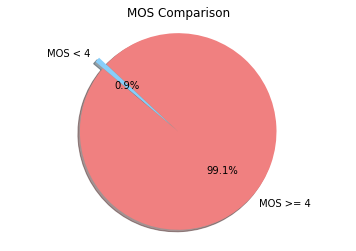

In [3]:
#insert bargraph from plotly of MOS
labels = 'MOS >= 4', 'MOS < 4'
sizes = [1374574, 12035]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("MOS Comparison")
plt.axis('equal')
plt.show()

In PESQ the time signals are mapped to the time-frequency domain using a short-term FFT with a
Hann window of size 32 ms

Text(0.5,0,'Bins')

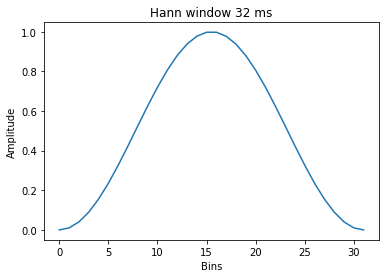

In [24]:
window = signal.hann(32)
plt.plot(window)
plt.title("Hann window 32 ms")
plt.ylabel("Amplitude")
plt.xlabel("Bins")



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5,0,'Normalized frequency [cycles per sample]')

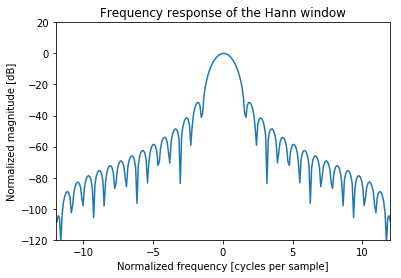

In [25]:
plt.figure()
A = fft(window, 256) / (len(window)/2.0)
freq = np.linspace(-12, 12, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-12, 12, -120, 20])
plt.title("Frequency response of the Hann window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")


Source: ITU-T P.862

In [32]:
Image(url= "https://i.imgur.com/LuHr9oG.png")

In [33]:
Image(url= "https://i.imgur.com/qKgx89W.png")

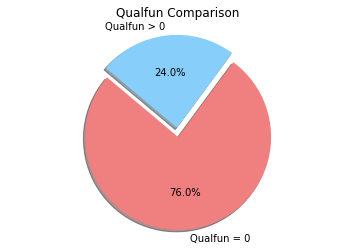

In [35]:
#insert bargraph from plotly of MOS
labels = 'Qualfun = 0', 'Qualfun > 0'
sizes = [1374842, 434067]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Qualfun Comparison")
plt.axis('equal')
plt.show()